# DATA SCIENCE PROJECT ON RICE LEAF DISEASE DETECTION


# INTRODUCTION
The rice leaf suffers from several bacterial, viral, or fungal diseases and these diseases reduce rice production significantly. To sustain rice demand for a vast population globally.The rice leaves related diseases often pose threats to the sustainable production of rice affecting many farmers around the world. Early diagnosis and appropriate remedy of the rice leaf infection is crucial in facilitating healthy growth of the rice plants to ensure adequate supply and food security to the rapidly increasing population.
### RICE LEAF DISEASE:
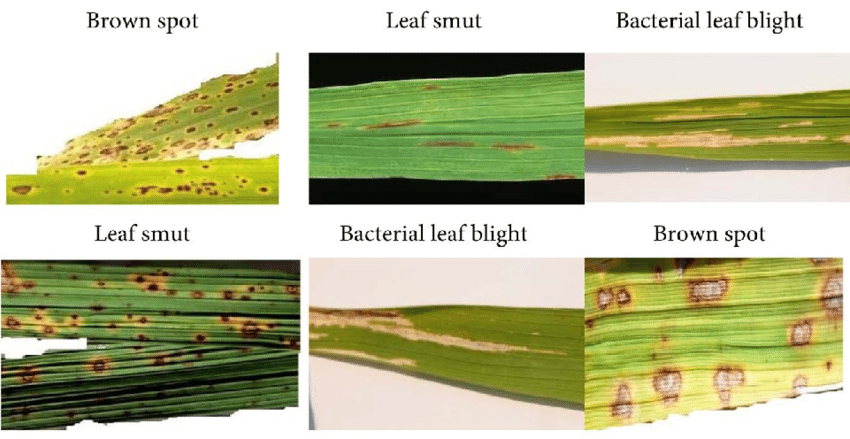

### WE HAVE DEVICE THE PROJECT INTO MULTIPLE STEPS
* Importing library
* Loading data
* Preparing data
* Data Processing
* Model building
* Training
* Evaluation
* Testing

### DATA SUMMARY
This dataset contains 120 jpg images of disease infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in each class.

Classes

* Leaf smut
* Brown spot
* Bacterial leaf blight

## PYTHON IMPLIMENTATION

### IMPORTING NECESSARY LIBRARY

In [1]:
import numpy as np
import keras
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
#from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
%matplotlib inline
import random



In [2]:
## To connect Google Drive (GDrive) with Colab
# Step:2 Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### MAKE SUBSET OF TRAIN, TEST, VALIDATION

In [3]:
import sys
print (sys.version)

3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]


In [4]:
pip install split-folders

In [5]:
import splitfolders
splitfolders.ratio(r"/content/drive/MyDrive/PRCP-1001-RiceLeaf/", output="output", seed=1337, ratio=(.8, 0.1,0.1))


import splitfolders
splitfolders.ratio(r"/content/drive/MyDrive/PRCP-1001-RiceLeaf/", output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 119 files [00:48,  2.44 files/s]
Copying files: 119 files [00:00, 318.40 files/s]


In [6]:
# Sorting the path of data into veriable
train_dir = '/content/drive/MyDrive/PRCP-1001-RiceLeaf'  #Location of training images
validation_dir = '/content/drive/MyDrive/PRCP-1001-RiceLeaf' # Location of test images
test_dir ='/content/drive/MyDrive/PRCP-1001-RiceLeaf/' # Location of test images

### GENERATING TRAINING AND VALIDATION BATCHES OF IMAGES

In [7]:
# Generating batches of image data
train_datagen = ImageDataGenerator(
    rescale= (1./255),
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=(1./255))




train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')


val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')


Found 119 images belonging to 3 classes.
Found 119 images belonging to 3 classes.


In [8]:
### PLOTTING TRAIN IMAGES WITH THEIR LABELS

In [9]:
# plotting train images with their labels
def plots(ims, figsize=(20,25), rows=4, interp = False, title = None):
    f = plt.figure(figsize=figsize)
    cols = len(ims) // rows if len(ims) % 2 ==0 else len(ims) // rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        sp.set_title(class_names[title[i].tolist().index(1)],fontsize=16)
        plt.imshow(ims[i])


# Make list of classes
class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

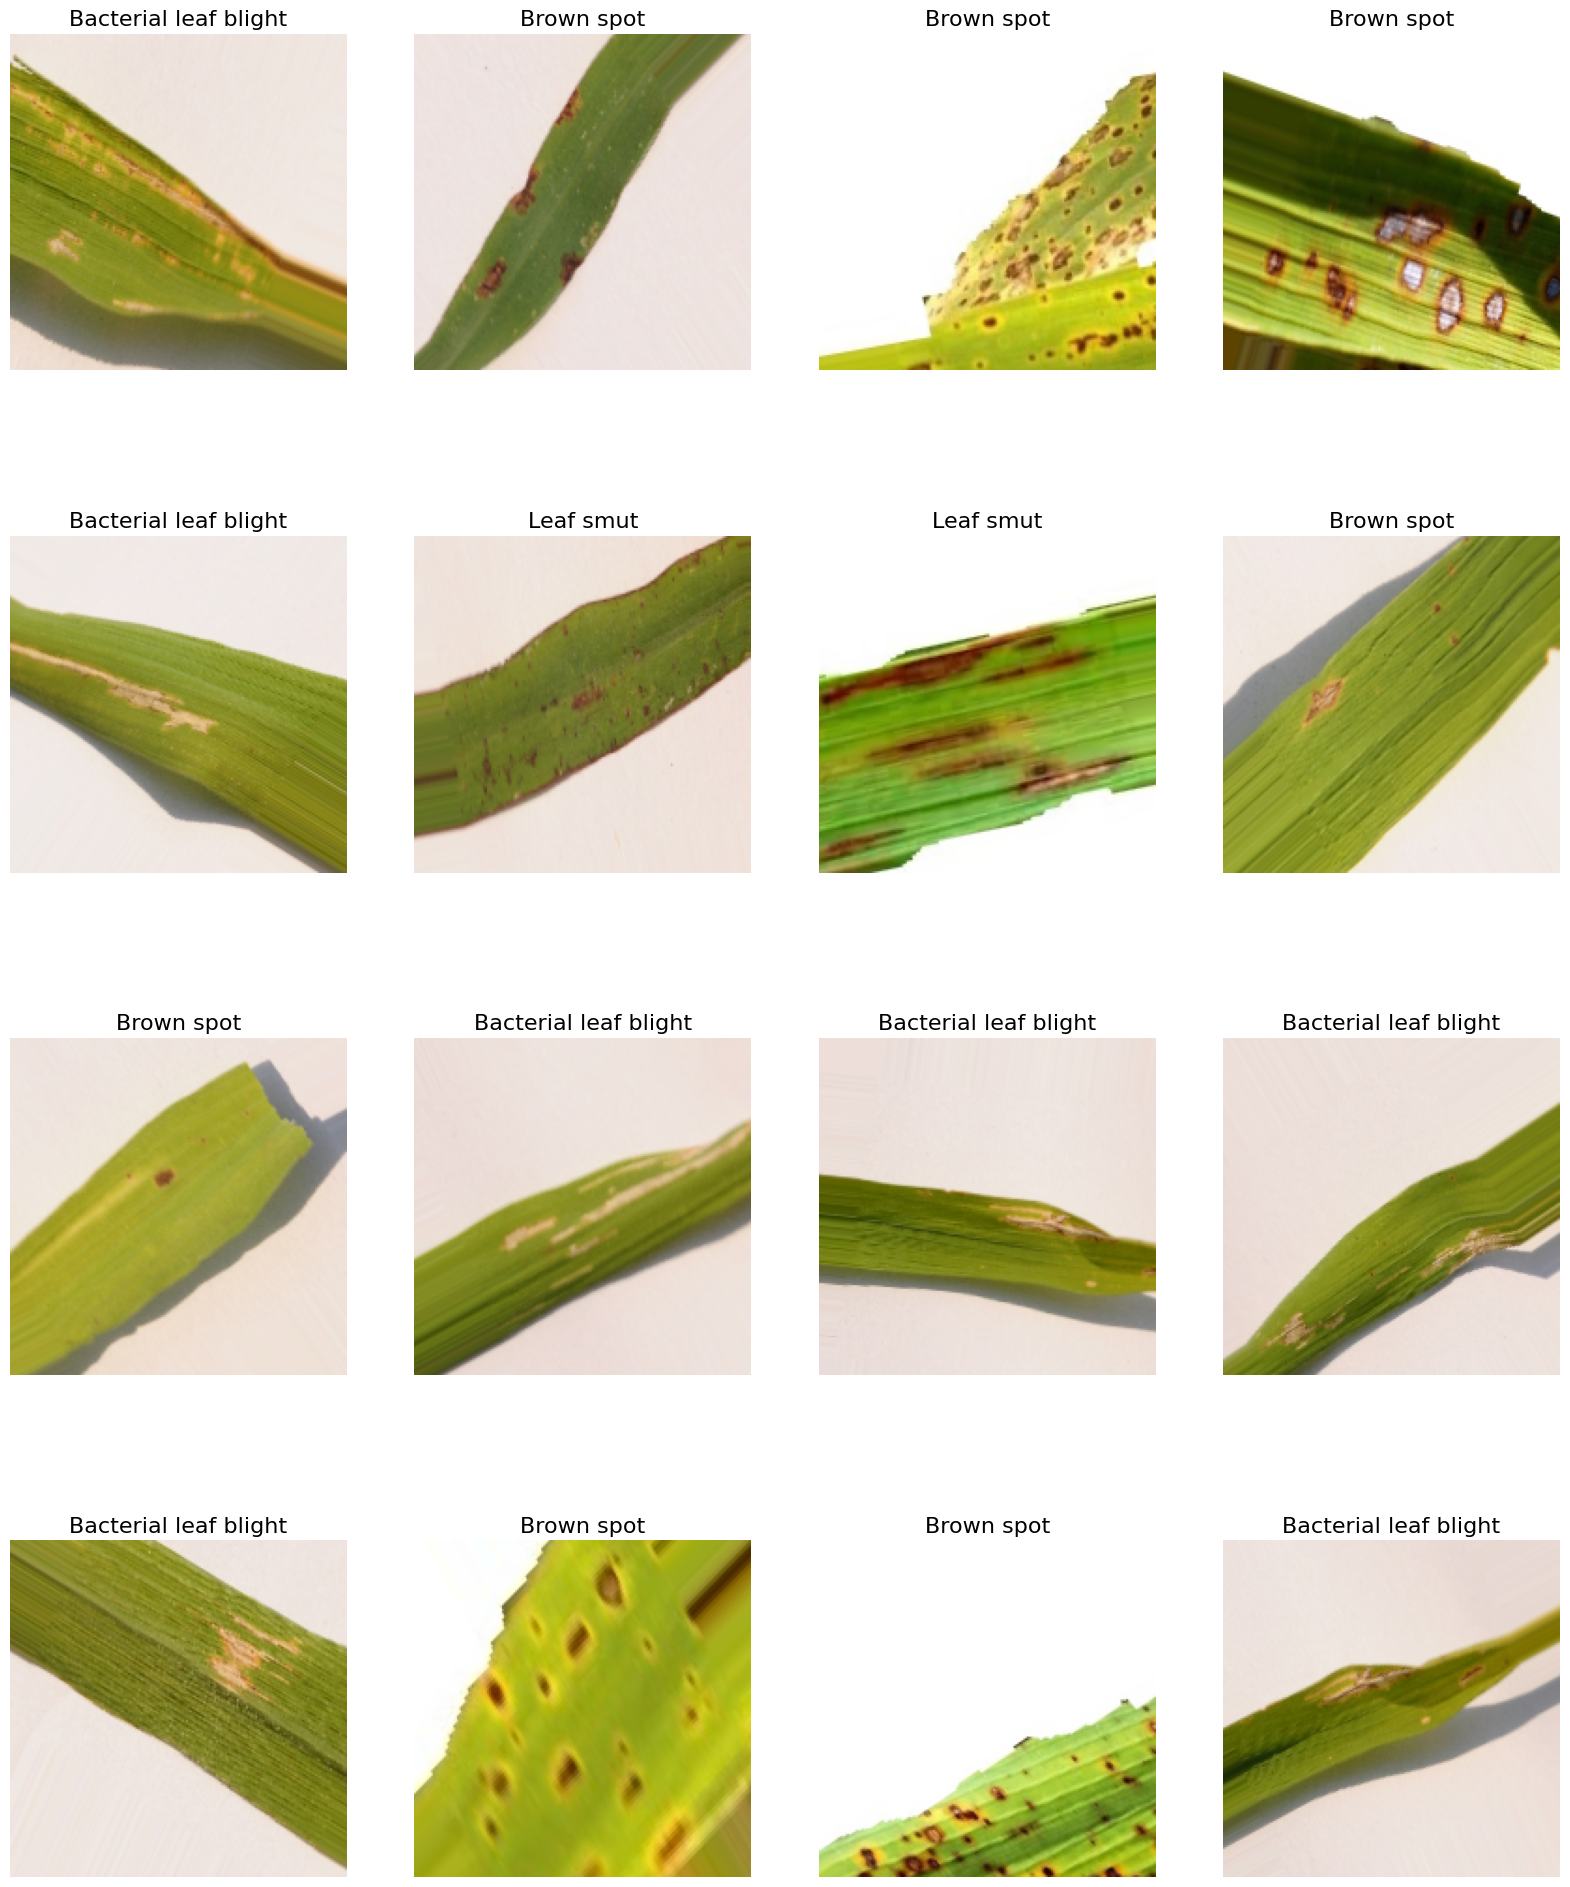

In [10]:
imgs, labels = next(train_generator)
plots(imgs, title = labels)

In [11]:
## CNN MODEL ARCHITECTURE

In [12]:
from keras.layers.core.activation import Activation
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(180,180,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Flatten())
model.add(layers.Dense(3, activation ='softmax'))

### PLOTTING GRAPHICAL REPRESENTATION OF MODEL





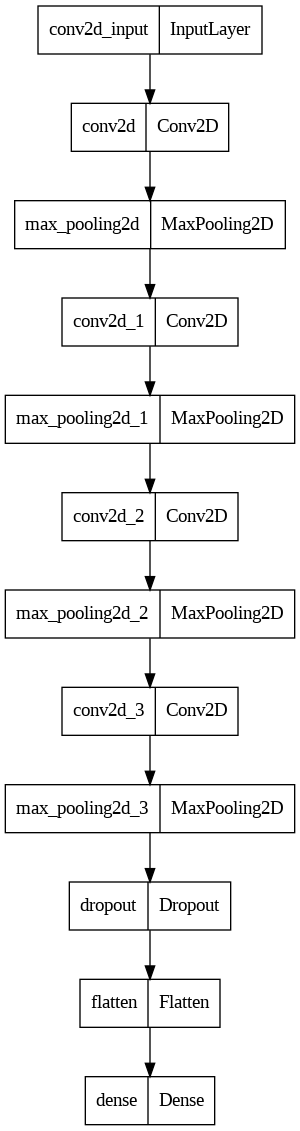

In [13]:
import keras
import pydotplus
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.plot_model(model)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

### COMPILE MODEL

In [15]:
from tensorflow.keras import optimizers
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


### TRAIN MODEL

In [16]:
# Fitting the data

history = model.fit_generator(train_generator,
    epochs=50, # epochs used to how many itertion (1fp + loss + 1bp)
    validation_data = val_generator,
)

<ipython-input-16-10258710d01e>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/50
8/8 [==============================] - 29s 4s/step - loss: 1.1180 - accuracy: 0.3782 - val_loss: 1.0936 - val_accuracy: 0.3361
Epoch 2/50
8/8 [==============================] - 18s 2s/step - loss: 1.0815 - accuracy: 0.3277 - val_loss: 1.0546 - val_accuracy: 0.5294
Epoch 3/50
8/8 [==============================] - 16s 2s/step - loss: 1.0873 - accuracy: 0.3445 - val_loss: 0.9955 - val_accuracy: 0.4874
Epoch 4/50
8/8 [==============================] - 22s 3s/step - loss: 1.0338 - accuracy: 0.4202 - val_loss: 0.9404 - val_accuracy: 0.4958
Epoch 5/50
8/8 [==============================] - 16s 2s/step - loss: 1.0194 - accuracy: 0.4622 - val_loss: 0.9673 - val_accuracy: 0.6218
Epoch 6/50
8/8 [==============================] - 17s 2s/step - loss: 1.0753 - accuracy: 0.4034 - val_loss: 1.0746 - val_accuracy: 0.4538
Epoch 7/50
8/8 [==============================] - 18s 2s/step - loss: 1.1110 - accuracy: 0.3529 - val_loss: 1.0851 - val_accuracy: 0.3697
Epoch 8/50
8/8 [==================

### AFTER TRAINING
* Validation accuracy.84.03%
* Training accuracy.83.19%%

### MODEL SAVING

In [17]:
model.save("model.h5")

### PLOTTING THE TRAINING ACCURACY AND VALIDATION ACCURACY AND TRAINING LOSS AND VALIDATION LOSS

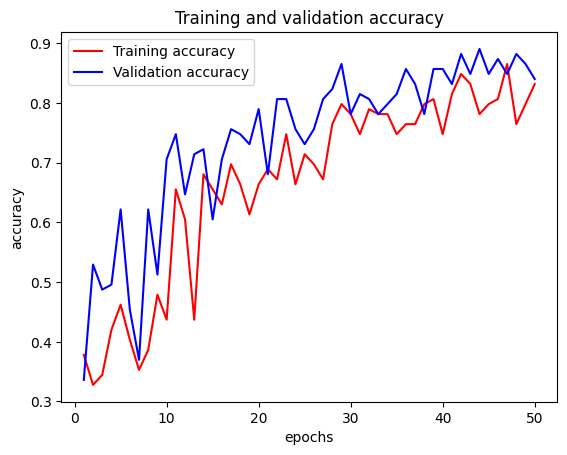

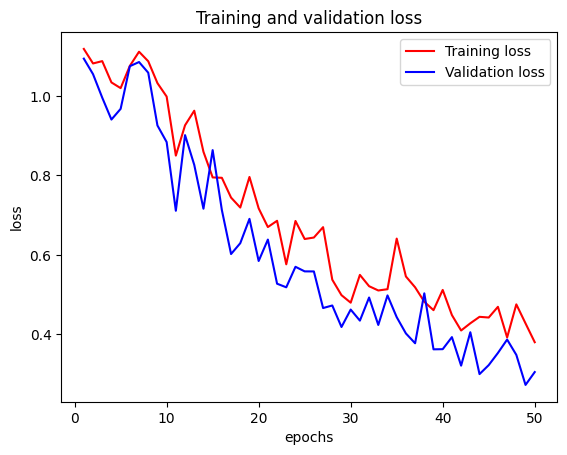

In [18]:
# Step:9 Plotting the training accuracy and validation accuracy
# Plotting the traning loss and validation loss
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

### CREATED MODEL SUMMARY

In [19]:
model = tf.keras.models.load_model("model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

### EVALUATION AND TESTING MODEL

In [20]:
test_datagen = ImageDataGenerator(rescale=(1./255))


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')

Found 119 images belonging to 3 classes.


In [21]:
model.evaluate(test_generator)


8/8 [==============================] - 4s 398ms/step - loss: 0.3055 - accuracy: 0.8403


[0.30553632974624634, 0.8403361439704895]

* Here the loss is 0.30 and the accuracy of the model is 0.84 percent means 84%.

### VISUALISE THE PREDICTION OF MODEL

1/1 [==============================] - 0s 57ms/step


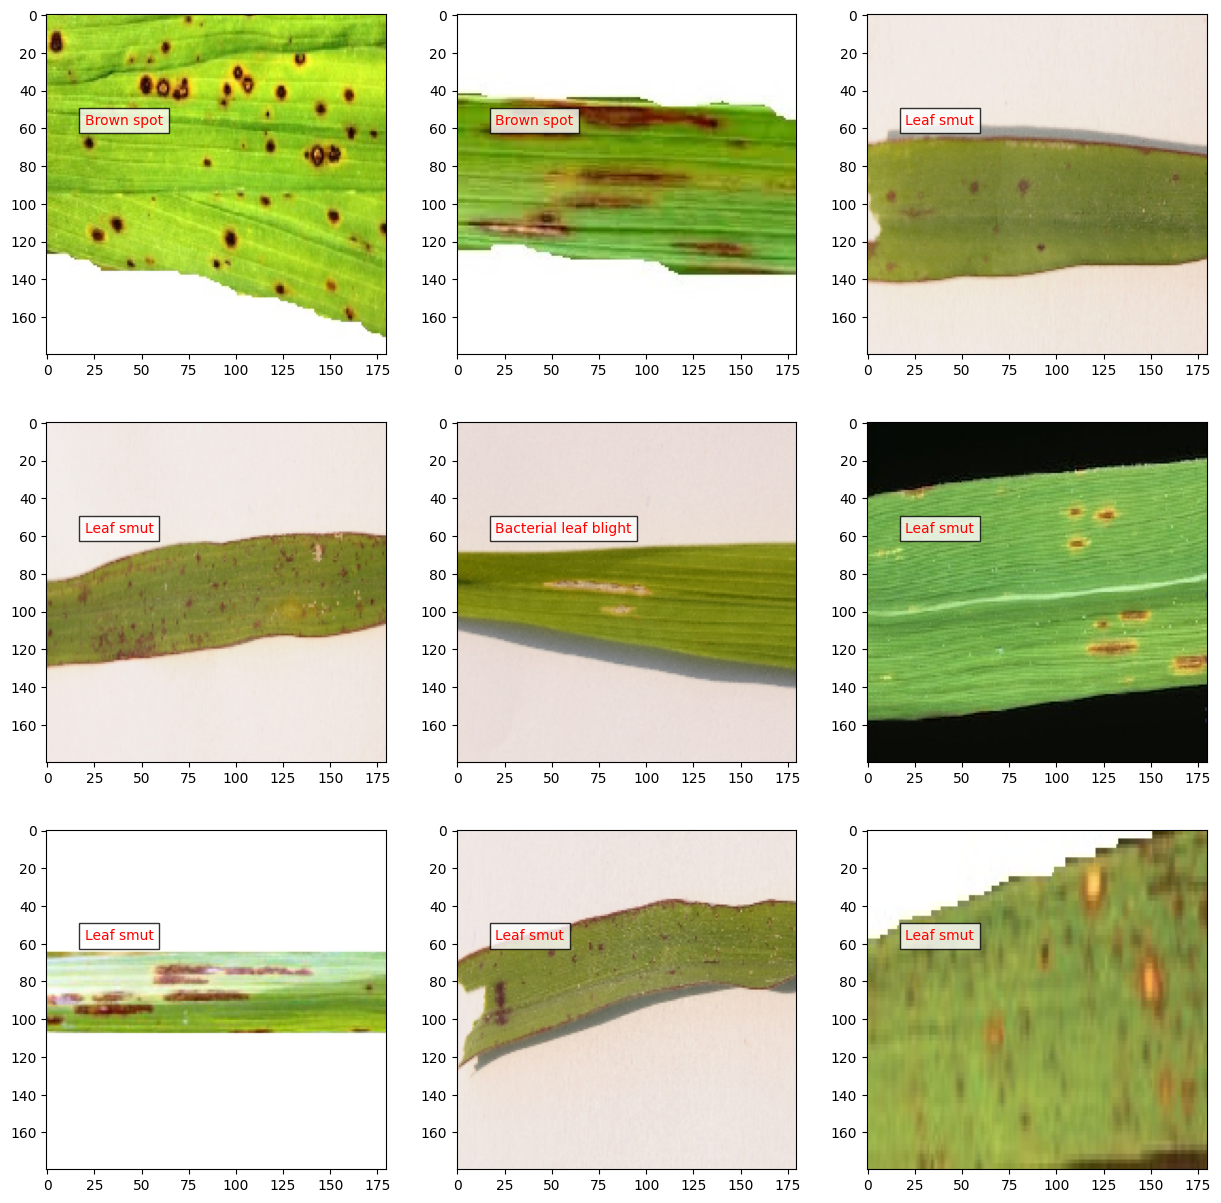

In [22]:
# Visualise the prediction of the model
imgs, labels = next(test_generator)
fig =plt.figure(figsize=(15,15))
columns = 3
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t = np.expand_dims(imgs[i],axis=0)
    prediction = model.predict(img_t)
    idx = prediction[0].tolist().index(max(prediction[0]))
    plt.text(20,58, class_names[idx],color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])


